In [1]:
# library imports

import numpy as np
import pandas as pd
import seaborn as sns
import mpl_toolkits
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# library imports

from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split


In [3]:
# Retrieving data from csv file
df = pd.read_csv('House_Price_Dataset.csv')
data = pd.read_csv('House_Price_Dataset.csv')

In [4]:
# Snippet of Data
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Comparing property type to price we can see this effects the price with type 'h' seemingly havng the highest values in price. We will inclue the property type in the prediction model. 

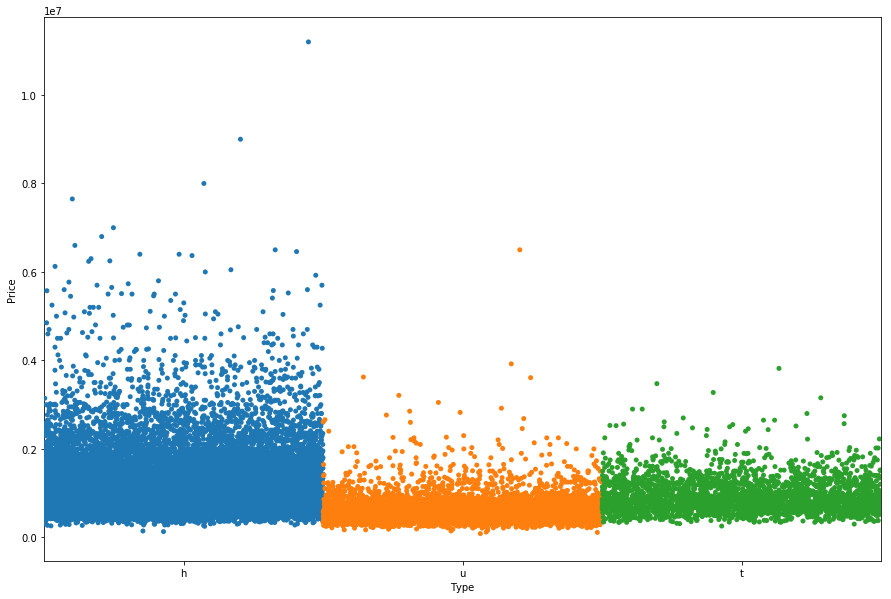

In [5]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='Type', y='Price', jitter=.5)
plt.show()

The graph below shows the prices of properties in each suburb, each colour representing a different suburb. As there are many suburbs the decision will be made to include this data but as a min, mean or max calculation of the total prices for each suburb.

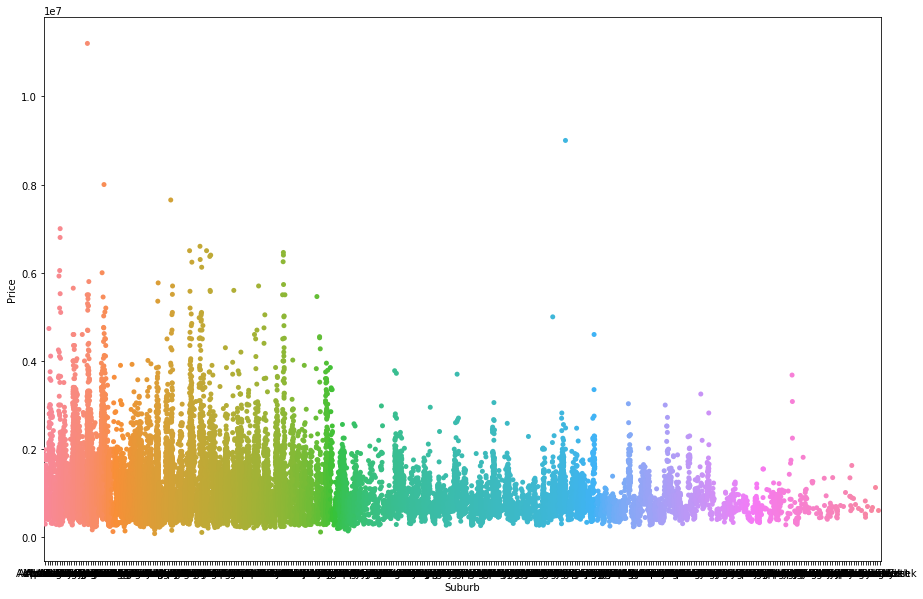

In [6]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='Suburb', y='Price', jitter=.5)
plt.show()

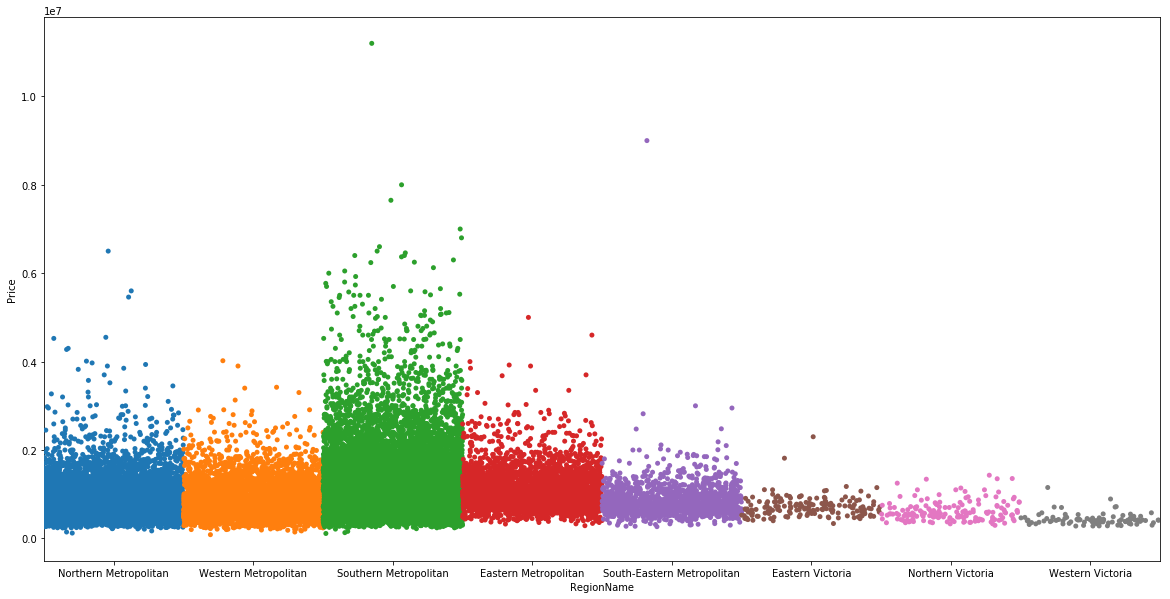

In [7]:
# Price by Region

f, ax = plt.subplots(figsize=(20, 10))
sns.stripplot(data = df, x='RegionName', y='Price', jitter=.5)
plt.show()

To establish most common method of sale with their prices

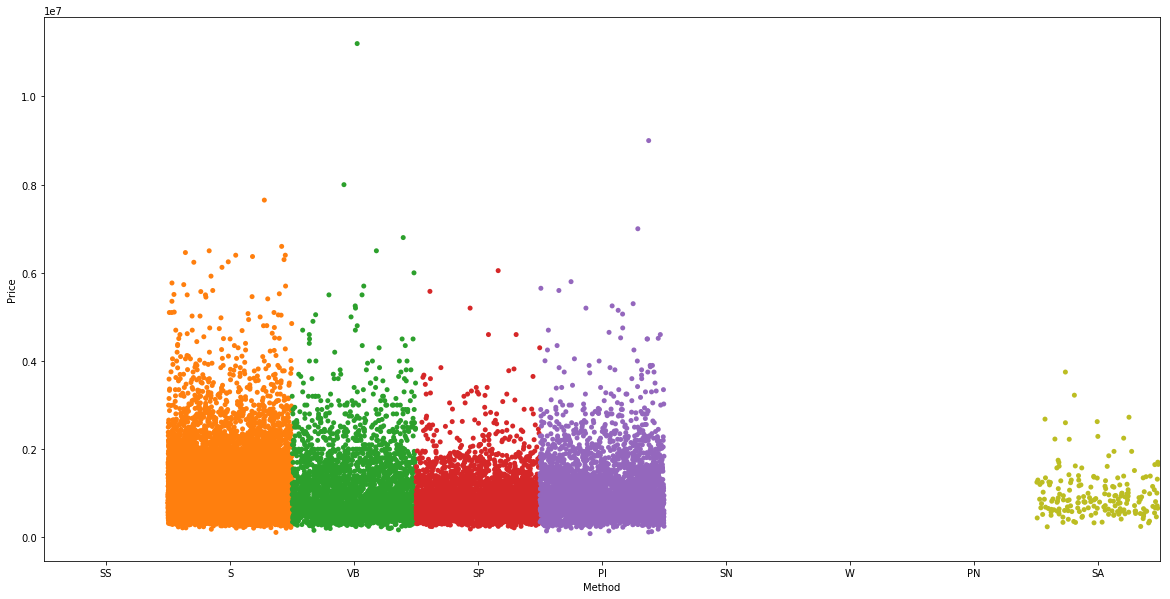

In [8]:
f, ax = plt.subplots(figsize=(20, 10))
sns.stripplot(data = df, x='Method', y='Price', jitter=.5)
plt.show()

Longitude and latitude positions shown as a scatter plot. Results show that there is a concentration of areas that are more popular. Especially around the 145, -38 mark. As a result these columns will remain in the dataset for the prediction model. 

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

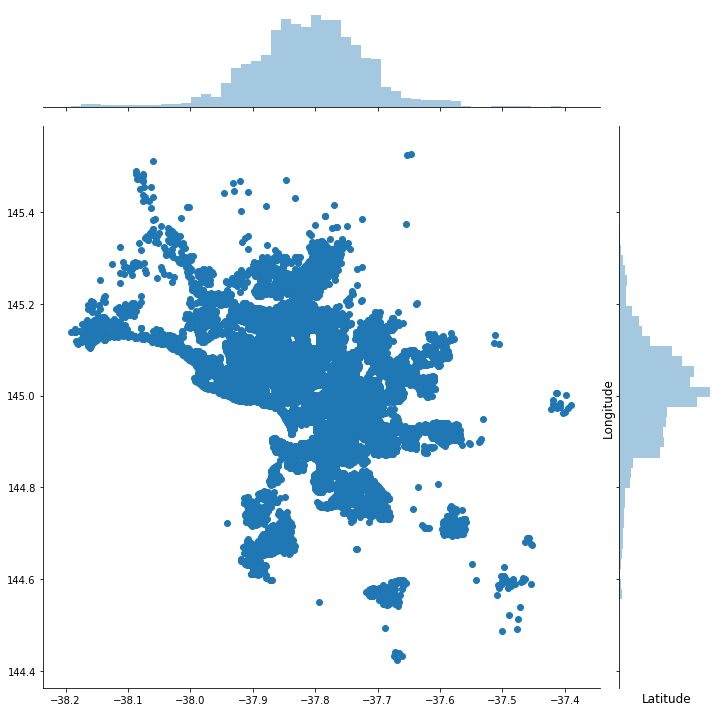

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [9]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.Latitude.values, y=df.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

## Pre-Processing

As we can see here a quite a few rows are missing data. We will first need to remove these rows during the data pre-processing phase. Although we do not want to remove all null rows as that would lose a lot of the data. The meaningful rowns to drop would be the ones that have a missing price.

In [10]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
Seller               0
Date                 0
Distance             1
Postcode             1
Rooms2            8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longitude         7976
RegionName           3
PropertyCount        3
dtype: int64

In [11]:
# removing rows that have price data missing
data = data.dropna(subset = ['Price'])
data = data.dropna(subset = ['Distance'])
data = data.dropna(subset = ['RegionName'])

# removing properties that have not been sold
data = data[data['Method'] != 'VB']
data = data[data['Method'] != 'PI']

# calculating the mean, min, max price for each suburb 
temp = data.groupby('Suburb').agg({'min', 'mean', 'max'})
temp2 = temp['Price']
temp2 = temp2.reset_index()
temp2.columns = ['Suburb', 'min_sub', 'mean_sub', 'max_sub']

# merging to new data set
data = pd.merge(data, temp2, on='Suburb', how='left')

# encoding String data to integers to be used in analysis
le = LabelEncoder()

data.Type = le.fit_transform(data.Type)
data.Method = le.fit_transform(data.Method)
data.RegionName = le.fit_transform(data.RegionName)
data.Type = le.fit_transform(data.Type)
data.Method = le.fit_transform(data.Method)
data.Suburb = le.fit_transform(data.Suburb)
data.Seller = le.fit_transform(data.Seller)
data.Date = le.fit_transform(data.Date)
data.CouncilArea = le.fit_transform(data.CouncilArea)


# replacing any leftover NaN values with the mean of the column
data.fillna(data.mean(), inplace=True)


To ensure no NaN values remain

In [12]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
Seller           0
Date             0
Distance         0
Postcode         0
Rooms2           0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Latitude         0
Longitude        0
RegionName       0
PropertyCount    0
min_sub          0
mean_sub         0
max_sub          0
dtype: int64

In [13]:
# to view the newly created columns
data.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount,min_sub,mean_sub,max_sub
0,0,85 Turner St,2,0,1480000.0,0,27,6,2.5,3067.0,...,154.175559,1966.979034,31,-37.7996,144.9984,2,4019.0,1.025224e+06,1985000.0,300000.0
1,0,25 Bloomburg St,2,0,1035000.0,0,27,7,2.5,3067.0,...,79.000000,1900.000000,31,-37.8079,144.9934,2,4019.0,1.025224e+06,1985000.0,300000.0
2,0,5 Charles St,3,0,1465000.0,2,27,8,2.5,3067.0,...,150.000000,1900.000000,31,-37.8093,144.9944,2,4019.0,1.025224e+06,1985000.0,300000.0
3,0,129 Charles St,2,0,941000.0,0,123,14,2.5,3067.0,...,154.175559,1966.979034,31,-37.8041,144.9953,2,4019.0,1.025224e+06,1985000.0,300000.0
4,0,124 Yarra St,3,0,1876000.0,0,184,14,2.5,3067.0,...,210.000000,1910.000000,31,-37.8024,144.9993,2,4019.0,1.025224e+06,1985000.0,300000.0


To gain a general overview of the data a heatmap is used along with the correlation coefficients to determine variables that a positively or negatively correlated. This will aid in deciding which columns to keep for the prediction model.

Columns with low coefficient scores (Correlated with price)

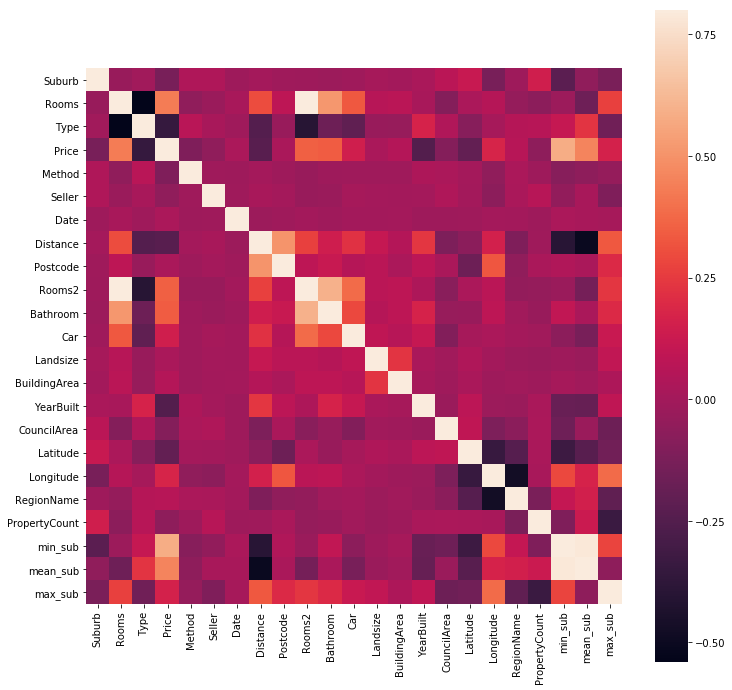

,Suburb,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Rooms2,...,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount,min_sub,mean_sub,max_sub
Suburb,1.000000,-0.030011,-0.003750,-0.131149,0.038467,0.037367,-0.014224,0.007613,-0.006735,-0.016723,...,-0.001163,0.022726,0.076155,0.117802,-0.128987,-0.012113,0.145502,-0.225199,-0.055717,-0.126466
Rooms,-0.030011,1.000000,-0.540821,0.428672,-0.054592,-0.026114,0.017375,0.297797,0.086262,0.833713,...,0.076653,0.017325,-0.095491,0.027612,0.059709,-0.039570,-0.069247,-0.017409,-0.160935,0.270342
Type,-0.003750,-0.540821,1.000000,-0.351538,0.071307,0.014944,-0.008604,-0.243773,-0.027724,-0.401613,...,-0.037549,0.171420,0.045659,-0.084193,0.014349,0.057379,0.064784,0.109320,0.232047,-0.157516
Price,-0.131149,0.428672,-0.351538,1.000000,-0.107740,-0.055805,0.029190,-0.233879,0.024475,0.349728,...,0.054609,-0.252399,-0.093012,-0.198450,0.175743,0.062820,-0.063503,0.582370,0.458441,0.162989
Method,0.038467,-0.054592,0.071307,-0.107740,1.000000,-0.009480,-0.016842,0.006717,-0.011962,-0.029217,...,-0.009844,0.032595,0.026476,0.007773,-0.056792,0.027641,-0.016546,-0.080062,-0.062921,-0.040517
Seller,0.037367,-0.026114,0.014944,-0.055805,-0.009480,1.000000,-0.008015,0.015956,0.006802,-0.028176,...,0.000787,0.008894,0.038040,0.003577,-0.066786,0.019748,0.065047,-0.052469,0.015910,-0.106844
Date,-0.014224,0.017375,-0.008604,0.029190,-0.016842,-0.008015,1.000000,-0.017602,-0.009476,0.003561,...,0.005065,-0.011896,-0.016754,-0.008432,0.004504,0.001211,-0.014865,0.026863,0.015684,0.014065
Distance,0.007613,0.297797,-0.243773,-0.233879,0.006717,0.015956,-0.017602,1.000000,0.506301,0.267374,...,0.051780,0.234983,-0.116273,-0.069964,0.157700,-0.110920,-0.008108,-0.395977,-0.507329,0.331114
Postcode,-0.006735,0.086262,-0.027724,0.024475,-0.011962,0.006802,-0.009476,0.506301,1.000000,0.086376,...,0.028569,0.082224,0.020951,-0.165712,0.324313,-0.054994,0.022077,0.042027,0.020583,0.195697
Rooms2,-0.016723,0.833713,-0.401613,0.349728,-0.029217,-0.028176,0.003561,0.267374,0.086376,1.000000,...,0.087520,0.030402,-0.078510,0.029439,0.073347,-0.047224,-0.041085,-0.025272,-0.138404,0.236371


In [14]:
f, ax = plt.subplots(figsize=(12, 12))
corrmat = data.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
corrmat


We need to further process the data and remove unused columns.

In [15]:
# selecting data to keep, removing all the rest as it will be unwanted
data_keep  = ['Type', 'YearBuilt', 'Method', 'Distance', 'Rooms', 'Bathroom', 'Car', 
              'Latitude','Longitude', 'mean_sub', 'max_sub', 'min_sub', 'Price']

# data stored in new variable
data = data[data_keep]

Selecting data to use in model

In [16]:
data_columns = data.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
print(data_columns.describe())

               Type     YearBuilt        Method      Distance         Rooms  \
count  21306.000000  21306.000000  21306.000000  21306.000000  21306.000000   
mean       0.525486   1966.979034      0.347038     11.678433      2.967052   
std        0.822092     23.667627      0.751498      7.019376      0.921436   
min        0.000000   1820.000000      0.000000      0.000000      1.000000   
25%        0.000000   1966.979034      0.000000      6.700000      2.000000   
50%        0.000000   1966.979034      0.000000     10.800000      3.000000   
75%        1.000000   1968.000000      0.000000     14.600000      4.000000   
max        2.000000   2018.000000      2.000000     48.100000     16.000000   

           Bathroom           Car      Latitude     Longitude      mean_sub  
count  21306.000000  21306.000000  21306.000000  21306.000000  2.130600e+04  
mean       1.551145      1.700112    -37.804880    144.993914  2.535606e+06  
std        0.586275      0.852500      0.083564      0

In [17]:
# to ensure no NaN values remain
data_columns.isnull().sum()

Type         0
YearBuilt    0
Method       0
Distance     0
Rooms        0
Bathroom     0
Car          0
Latitude     0
Longitude    0
mean_sub     0
dtype: int64

### Training and Test Data

In [18]:
# assigning data to variables to train
train_data = data_columns
labels = data.Price

# training data
x_train, x_test, y_train, y_test = train_test_split(train_data, labels, test_size = 0.2, random_state=2)


### Linear Regression

In [19]:
# assigning model to variable
reg = linear_model.LinearRegression()

# fitting model
reg.fit(x_train,y_train)

score = reg.score(x_test, y_test)

print(score * 100, "%")

59.03583404749486 %


### Analysis

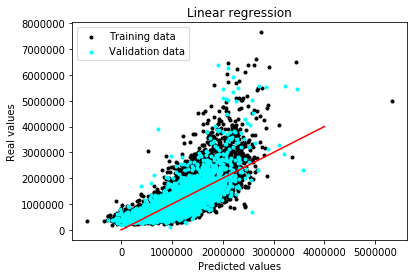

In [20]:
# Look at predictions on training and validation set
y_train_pred = reg.predict(x_train)
y_predict = reg.predict(x_test)


# Plot predictions
plt.scatter(y_train_pred, y_train, c = "black", marker = ".", label = "Training data")
plt.scatter(y_predict, y_test, c = "cyan", marker = ".", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 4e6], [10.5, 4e6], c = "red")
plt.show()

In [21]:
regression_model_mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error: ", regression_model_mse)

Mean Squared Error:  155344878779.88214


In [22]:
# Calculated R Squared
print(metrics.explained_variance_score(y_test, y_predict))

0.5904434319682843


### Gradient Boosting

In [23]:
# Assigning model to variable
gradient_boost = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
                                                      learning_rate = 0.1, loss = 'ls')
# Fitting model
gradient_boost.fit(x_train, y_train)

# Accuracy value with gradient boosting
score = gradient_boost.score(x_test, y_test)

print("Accuracy Score: ", score * 100, "%")



Accuracy Score:  77.06482605702185 %


### Gradient Boosting Visualisation

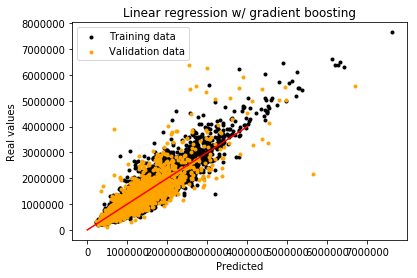

In [24]:

# Predictions on training and validation set
y_train_pred = gradient_boost.predict(x_train)
y_predict = gradient_boost.predict(x_test)

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "black", marker = ".", label = "Training data")
plt.scatter(y_predict, y_test, c = "orange", marker = ".", label = "Validation data")

plt.title("Linear regression w/ gradient boosting")
plt.xlabel("Predicted")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 4e6], [10.5, 4e6], c = "red")
plt.show()


### Random Forest

In [25]:
# assigning model to variable
random_forests = RandomForestRegressor()

# fitting model
random_forests.fit(x_train, y_train)

# Predictions on training and validation set
y_train_pred = random_forests.predict(x_train)
y_predict = random_forests.predict(x_test)

# accuracy score of predictions
acc_random_forests = random_forests.score(x_test, y_test) 
print("Accuracy score: ", acc_random_forests * 100, "%")

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score:  74.88047793148682 %


### Random Forest Visualisation

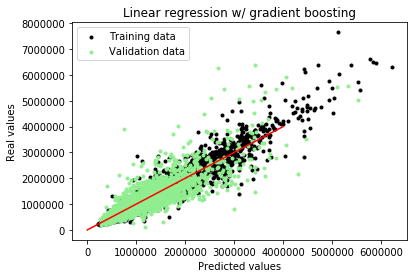

In [26]:
# Predictions on training and validation set
y_train_pred = random_forests.predict(x_train)
y_predict = random_forests.predict(x_test)

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "black", marker = ".", label = "Training data")
plt.scatter(y_predict, y_test, c = "lightgreen", marker = ".", label = "Validation data")

plt.title("Linear regression w/ gradient boosting")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 4e6], [10.5, 4e6], c = "red")
plt.show()


### For use in establishing mean suburb price to parse to prediction

In [27]:
# enter suburb here for calculating mean
suburb = 'Altona'

In [28]:
temp = df.groupby('Suburb').agg({'mean'})
temp2 = temp['Price']
temp2 = temp2.reset_index()
temp2.columns = ['Suburb', 'mean']
temp2 = temp2[(temp2['Suburb'] == suburb)]
print(temp2)

   Suburb           mean
7  Altona  884155.504587


# Price Prediction

In [29]:

# ENTER DATA HERE TO PREDICT PRICE - refer to README for details
client_data = [[1, 2015, 1, 10, 10, 2, 2, -37, 140, 884155.504587]] # Client 1
              

# Show predictions
for i, price in enumerate(gradient_boost.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $1,146,983.61
